# 1- Importando Bibliotecas

In [50]:
import pandas                  as pd 
import seaborn                 as sns
import pandas                  as pd
import seaborn                 as sns
import matplotlib.pyplot       as plt
import numpy                   as np

from datetime                  import datetime
from sklearn.model_selection   import train_test_split
from sklearn.linear_model      import LinearRegression
from sklearn                   import metrics

# 2- Importando o dataset

In [51]:
url = '/Users/fernanda/Library/Mobile Documents/com~apple~CloudDocs/kaggle/Health and Demographics Dataset/Life_Expectancy_Data.csv'
pd.read_csv(url)
df = pd.read_csv(url)

# 3- Conhecendo os dados 

Segue para a análise um conjunto de dados sobre saúde, economia e demografia, farei uma análise para predizer a expectativa de vida. 

Colunas:

- **Country**: Nome do país.
- **Year**: Ano da coleta dos dados.
- **Life expectancy**: Quanto tempo as pessoas podem esperar viver.
- **percentage expenditure**: Despesas com saúde.
- **Total expenditure**: Acompanhe as despesas totais com saúde como uma percentagem do PIB.
- **GDP**: Produto Interno Bruto.
- **Population**: Tamanho da população de uma nação.
- **Income composition of resources**: Distribuição do rendimento e o acesso aos recursos.
- **Schooling**: Meça a dádiva de conhecimento com dados sobre a média de anos de escolaridade.


 # 4- Limpeza e tratamento dos dados

### 4.1- Renomeando e excluindo colunas

In [52]:
#Cópia do DF
df1 = df.copy()

In [53]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [54]:
#Excluindo colunas

colunas= {'Adult Mortality','infant deaths','Status',
          'Alcohol','Hepatitis B','Total expenditure',
          'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
          'Diphtheria ', ' HIV/AIDS',' thinness  1-19 years',
          ' thinness 5-9 years'
         }

df1 = df.drop(colunas , axis=1)
df1.head(3)

,Country,Year,Life expectancy,percentage expenditure,GDP,Population,Income composition of resources,Schooling
0,Afghanistan,2015,65.0,71.279624,584.259210,33736494.0,0.479,10.1
1,Afghanistan,2014,59.9,73.523582,612.696514,327582.0,0.476,10.0
2,Afghanistan,2013,59.9,73.219243,631.744976,31731688.0,0.470,9.9


In [55]:
df1.columns

Index(['Country', 'Year', 'Life expectancy ', 'percentage expenditure', 'GDP',
       'Population', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [56]:
#Renomeando Colunas
new_name = {
            'Country': 'País', 
            'Year': 'Ano',
            'percentage expenditure': 'Despesa com saúde (%)',
            'Life expectancy ': 'Expectativa de vida',
            'GDP': 'PIB',
            'Population': 'População',
            'Schooling': 'Escolaridade (anos)',
            'Income composition of resources': 'Rendimentos e acesso aos recursos'
           }

df1.rename(columns=new_name, inplace=True )
df1.head(3)

,País,Ano,Expectativa de vida,Despesa com saúde (%),PIB,População,Rendimentos e acesso aos recursos,Escolaridade (anos)
0,Afghanistan,2015,65.0,71.279624,584.259210,33736494.0,0.479,10.1
1,Afghanistan,2014,59.9,73.523582,612.696514,327582.0,0.476,10.0
2,Afghanistan,2013,59.9,73.219243,631.744976,31731688.0,0.470,9.9


### 4.2- Características gerais

In [57]:
#Tamanho do DF
print(f'Número de linhas: {df1.shape[0]}')
print(f'Número de colunas: {df1.shape[1]}')

Número de linhas: 1649
Número de colunas: 8


In [58]:
#Análise Estatística
df1.describe()

,Ano,Expectativa de vida,Despesa com saúde (%),PIB,População,Rendimentos e acesso aos recursos,Escolaridade (anos)
count,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000
mean,2007.840509,69.302304,698.973558,5566.031887,1.465363e+07,0.631551,12.119891
std,4.087711,8.796834,1759.229336,11475.900117,7.046039e+07,0.183089,2.795388
min,2000.000000,44.000000,0.000000,1.681350,3.400000e+01,0.000000,4.200000
25%,2005.000000,64.400000,37.438577,462.149650,1.918970e+05,0.509000,10.300000
50%,2008.000000,71.700000,145.102253,1592.572182,1.419631e+06,0.673000,12.300000
75%,2011.000000,75.000000,509.389994,4718.512910,7.658972e+06,0.751000,14.000000
max,2015.000000,89.000000,18961.348600,119172.741800,1.293859e+09,0.936000,20.700000


In [59]:
#Tipo de dados
df1.dtypes

País                                  object
Ano                                    int64
Expectativa de vida                  float64
Despesa com saúde (%)                float64
PIB                                  float64
População                            float64
Rendimentos e acesso aos recursos    float64
Escolaridade (anos)                  float64
dtype: object

### 4.3- Consultando presença de NaN

In [60]:
df1.isnull().sum()

País                                 0
Ano                                  0
Expectativa de vida                  0
Despesa com saúde (%)                0
PIB                                  0
População                            0
Rendimentos e acesso aos recursos    0
Escolaridade (anos)                  0
dtype: int64

# 5- Correlações

In [61]:
#Qt de registros por país
df1['País'].nunique()

133

### 5.2- Correlação entre variáveis

Foi observado que as colunas que apresentam maior correlação com a variável Alvo (Expectativa de vida) são:
- Escolaridade(anos) 
- Rendimentos e acesso aos recursos

E que: 
- A variável PIB tem uma forte correlação com a variável Despesas com saúde.

In [62]:
df1.corr().round(2)

/var/folders/zh/064dhp151fs045_t5cr7fjwc0000gn/T/ipykernel_33174/1440075714.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr().round(2)


,Ano,Expectativa de vida,Despesa com saúde (%),PIB,População,Rendimentos e acesso aos recursos,Escolaridade (anos)
Ano,1.00,0.05,0.07,0.10,0.01,0.12,0.09
Expectativa de vida,0.05,1.00,0.41,0.44,-0.02,0.72,0.73
Despesa com saúde (%),0.07,0.41,1.00,0.96,-0.02,0.40,0.42
PIB,0.10,0.44,0.96,1.00,-0.02,0.45,0.47
População,0.01,-0.02,-0.02,-0.02,1.00,-0.01,-0.04
Rendimentos e acesso aos recursos,0.12,0.72,0.40,0.45,-0.01,1.00,0.78
Escolaridade (anos),0.09,0.73,0.42,0.47,-0.04,0.78,1.00


/var/folders/zh/064dhp151fs045_t5cr7fjwc0000gn/T/ipykernel_33174/1853921285.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df1.corr(), annot=True)


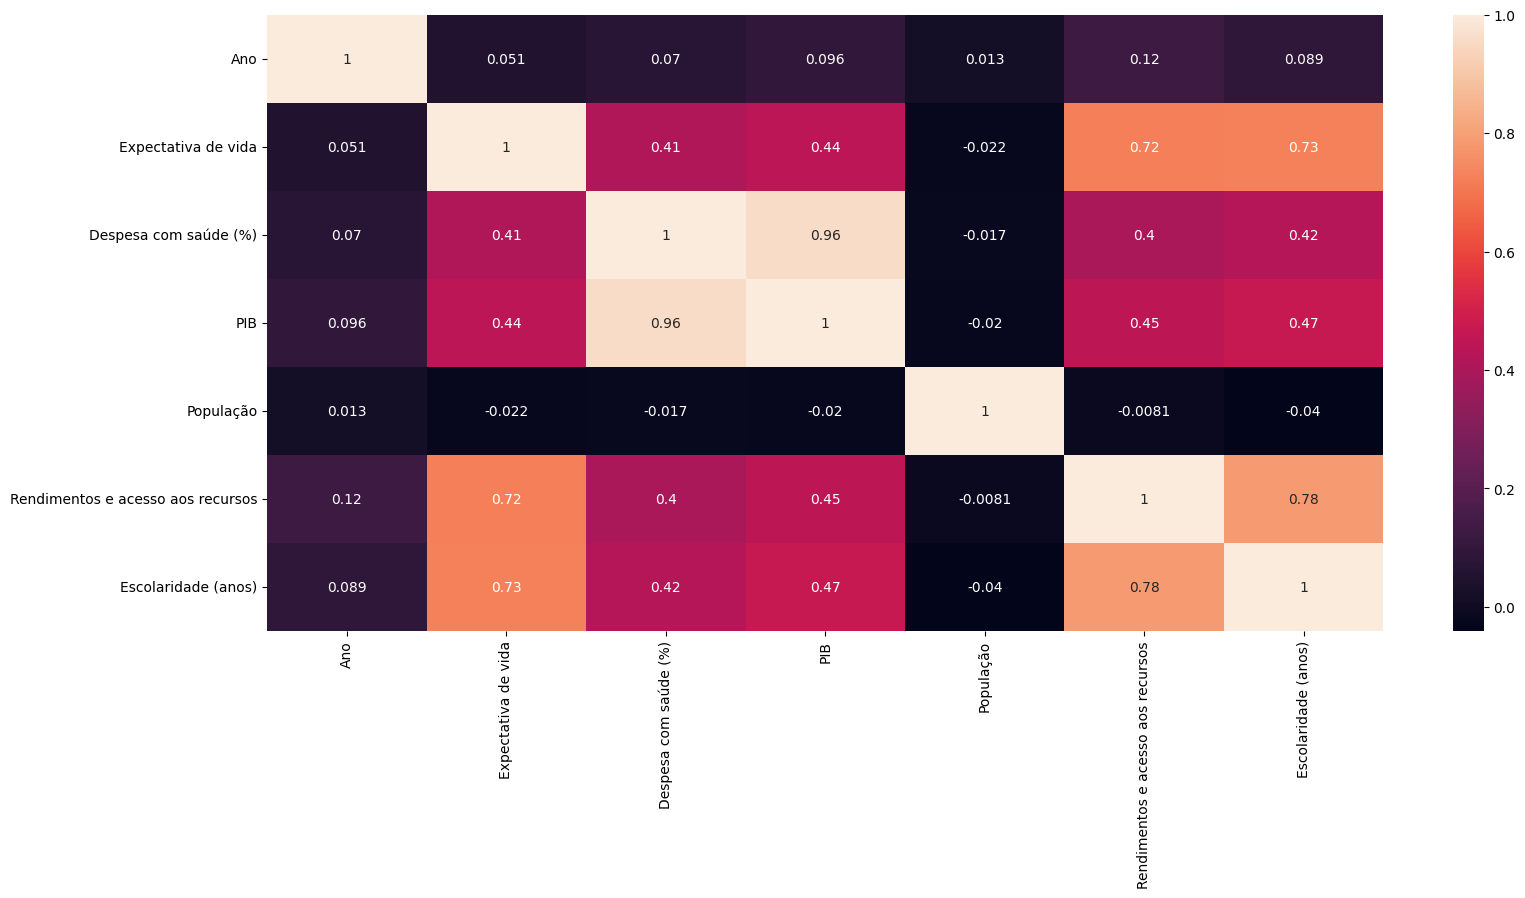

In [63]:
# Matrix de correlação

plt.rcParams['figure.figsize'] = (18,8)
ax = sns.heatmap(df1.corr(), annot=True)

# 6- Análises gráficas

Text(0, 0.5, 'Expectativa de vida')

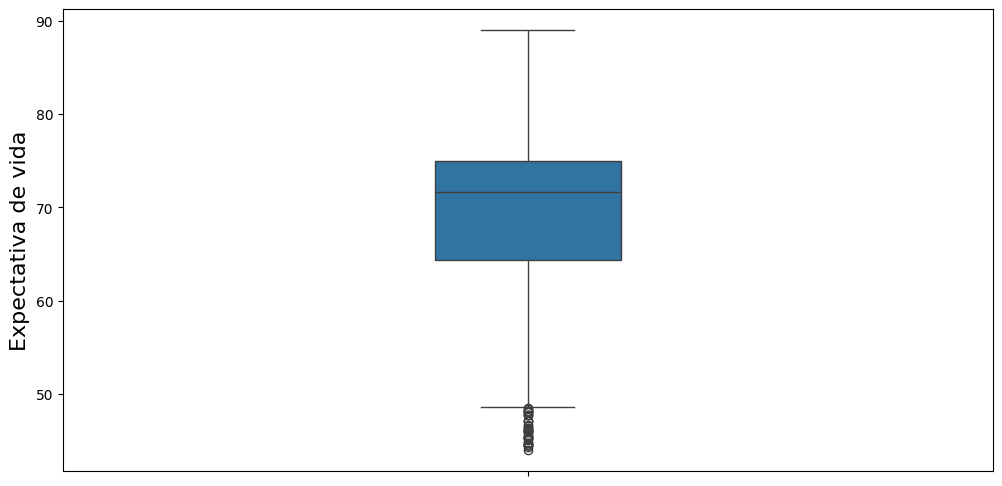

In [64]:
#BoxPlot da variável dependente(y)

ax = sns.boxplot(data=df1['Expectativa de vida'], width=0.2)
#Formatação do tamanho
ax.figure.set_size_inches(12,6)
#lables dos eixos
ax.set_ylabel('Expectativa de vida', fontsize=16)

/var/folders/zh/064dhp151fs045_t5cr7fjwc0000gn/T/ipykernel_33174/2427462158.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df1['Expectativa de vida'])


<AxesSubplot: title={'center': 'Distribuição de Frequências'}, xlabel='Expectativa de vida', ylabel='Density'>

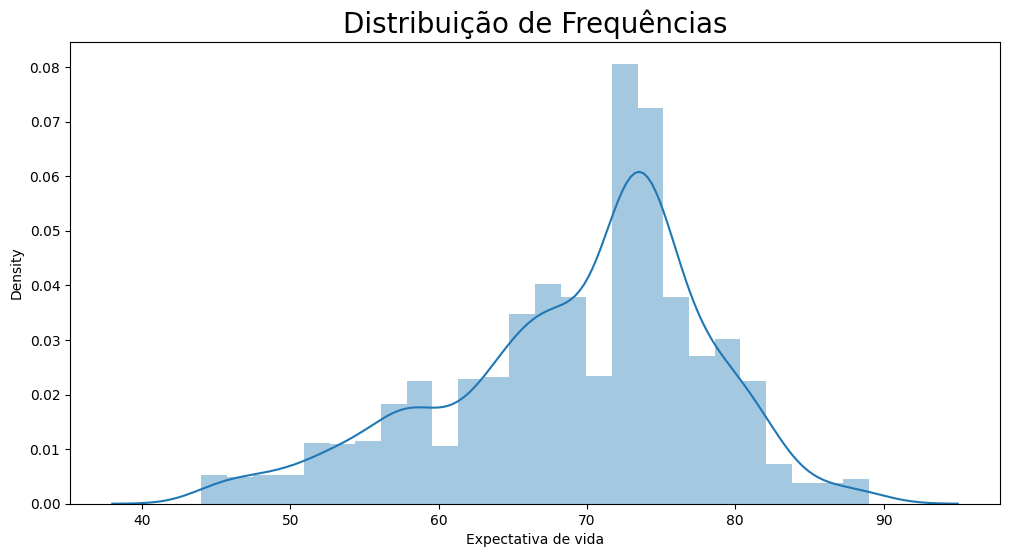

In [65]:
#Distribuição de frequencias da variável Alvo (y)

ax = sns.distplot(df1['Expectativa de vida'])
ax.figure.set_size_inches(12,6)
#titulo
ax.set_title('Distribuição de Frequências', fontsize=20)
ax

<AxesSubplot: title={'center': 'Expectativa de vida em realção a distribuição de rendimentos e acesso a recursos'}, xlabel='Rendimentos e acesso aos recursos', ylabel='Expectativa de vida'>

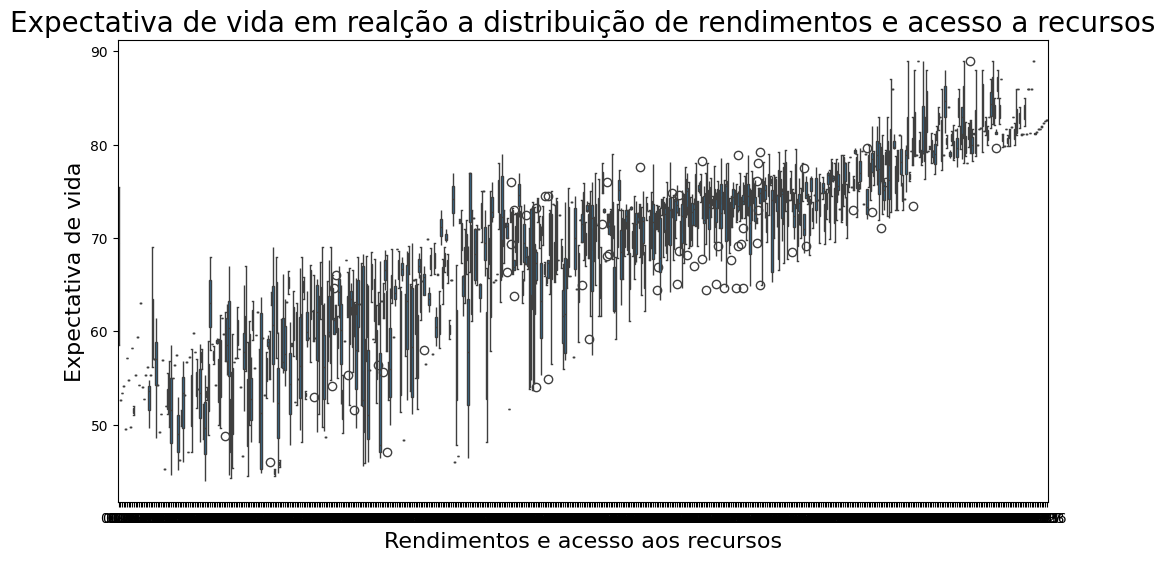

In [66]:
#Plotando as variáveis: x='Rendimentos e acesso aos recursos'e y='Expectativa de vida'

ax = sns.boxplot(x='Rendimentos e acesso aos recursos', y='Expectativa de vida', data=df1 , orient='v')
#Formatação do tamanho
ax.figure.set_size_inches(12,6)
#titulo
ax.set_title('Expectativa de vida em realção a distribuição de rendimentos e acesso a recursos', fontsize=20)
#lables dos eixos
ax.set_xlabel('Rendimentos e acesso aos recursos', fontsize=16)
ax.set_ylabel('Expectativa de vida', fontsize=16)
ax

<AxesSubplot: title={'center': 'Expectativa de vida em realção a escolaridade'}, xlabel='Escolaridade (anos)', ylabel='Expectativa de vida'>

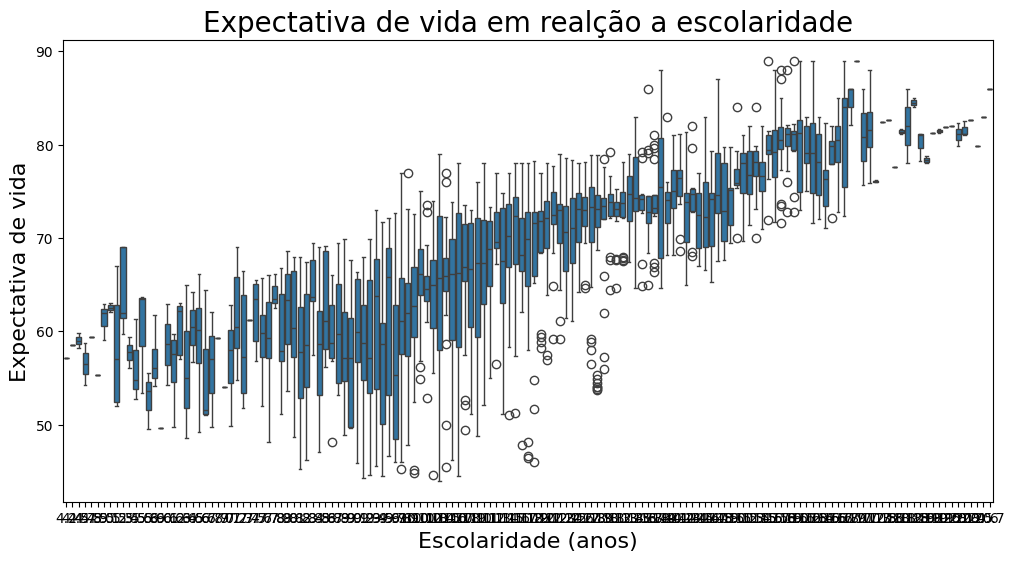

In [67]:
#Plotando as variáveis: x='Rendimentos e acesso aos recursos'e y='Expectativa de vida'

ax = sns.boxplot(x='Escolaridade (anos)', y='Expectativa de vida', data=df1 , orient='v')
#Formatação do tamanho
ax.figure.set_size_inches(12,6)
#titulo
ax.set_title('Expectativa de vida em realção a escolaridade', fontsize=20)
#lables dos eixos
ax.set_xlabel('Escolaridade (anos)', fontsize=16)
ax.set_ylabel('Expectativa de vida', fontsize=16)
ax

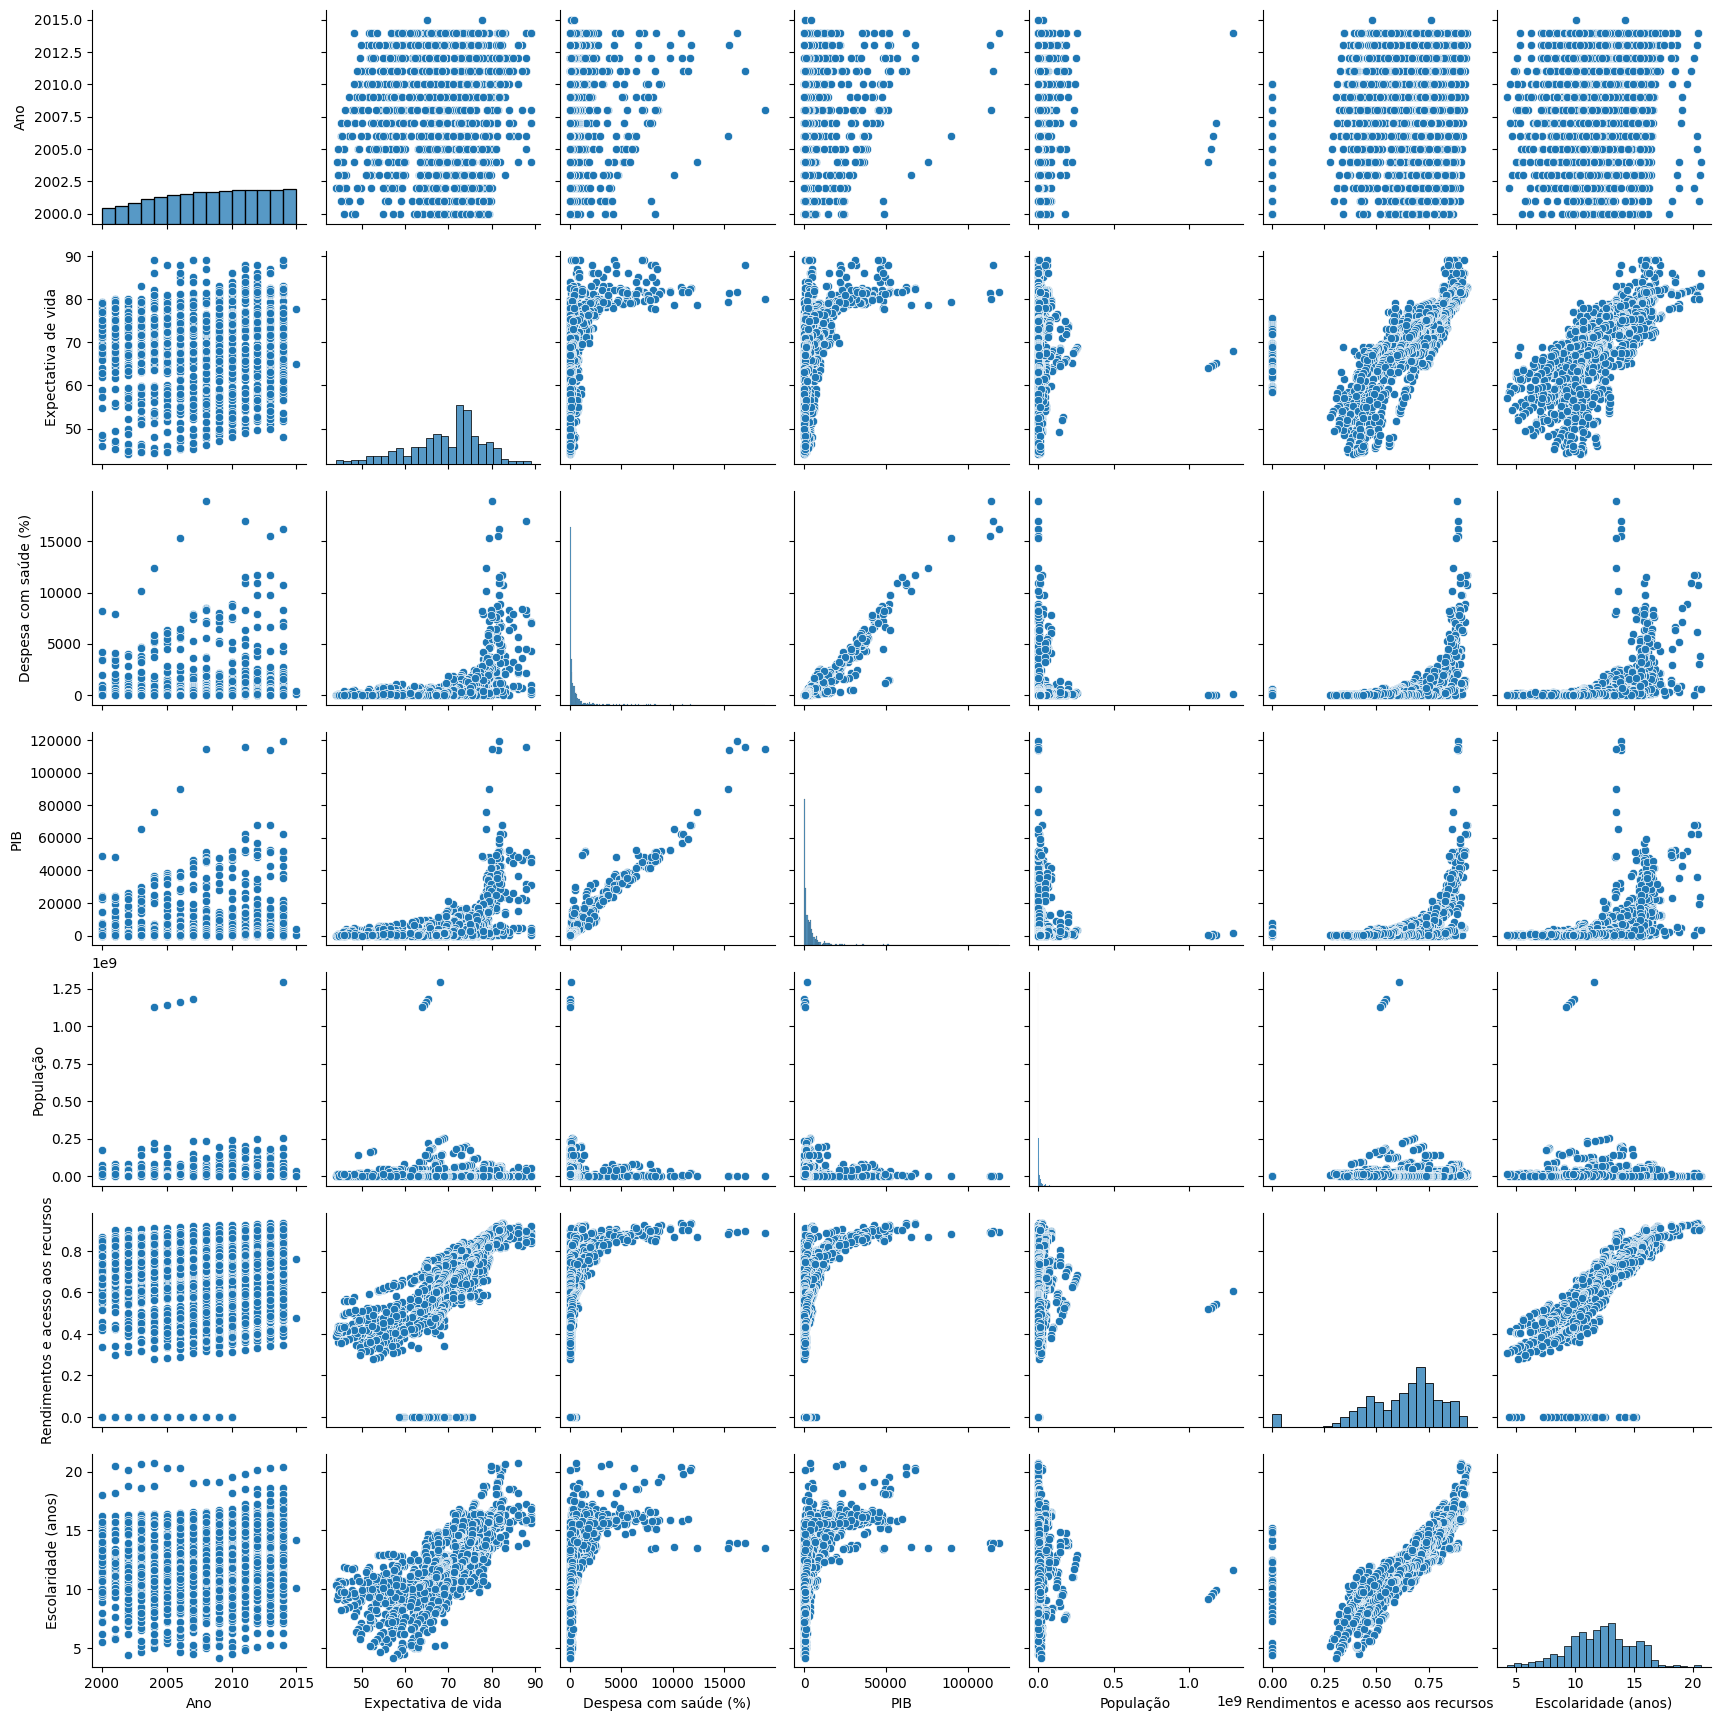

In [68]:
#Variável Dependente(y) X Variável Explicativas(x) (pairplot)

ax = sns.pairplot(df1)

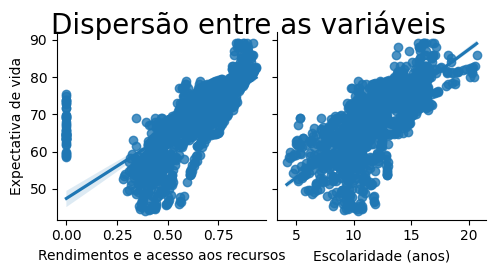

In [69]:
#Plotando o pairplot fixando somente uma variável no eixo y

ax = sns.pairplot(df1, y_vars='Expectativa de vida', x_vars=['Rendimentos e acesso aos recursos',
'Escolaridade (anos)'], kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.05)
ax

# 7- Explorando os dados

Foi observado que:

- As maiores expectativas de vida estão concentradas nos países da Europa.

Quanto maior é a expectativa de vida:
- Maior é o PIB do país; 
- Maior são os rendimentos e acessos a recursos; 
- Maior é a escolaridade;
- Em sua grande maioria os países são desenvolvidos.


### 7.1- Agrupamentos

In [70]:
# Média da expectativa por país 

media_expectativa_pais = df1.groupby(['Expectativa de vida', 'País']).mean().sort_values('Expectativa de vida', ascending = False)
media_expectativa_pais.head(20)

Ano  Despesa com saúde (%)            PIB  \
Expectativa de vida País                                                       
89.0                Spain       2007.0             510.932701    3279.414000   
                    Portugal    2014.0             271.254553    2277.536130   
                    Italy       2004.0            4270.914882   31174.561180   
                    Germany     2014.0             941.756291    4792.652880   
                    France      2007.5            3533.761537   22915.120535   
                    Belgium     2014.0            7163.348923   47439.396840   
88.0                Italy       2005.0            4506.255963   31959.262150   
                    Greece      2014.0            2163.043414   21673.781700   
                    Austria     2011.5            8075.339556   49730.157060   
                    Luxembourg  2011.0           17028.527980  115761.577000   
                    Spain       2006.0            4460.390006   28482.694800   
87.0                Malta       2011.0            3601.287457   22821.847000   
                    Canada      2008.0            8433.936814   46596.335990   
                    Belgium     2013.0             702.359357    4651.386470   
86.0                Portugal    2013.0            2698.018170   21618.735340   
                    Luxembourg  2010.0            2267.252192   14965.361000   
                    Ireland     2010.0            4509.234803   48538.587760   
                    Greece      2013.0            2183.106986   21874.819500   
                    Germany     2012.5             867.895635    4559.580170   
                    France      2006.0            5689.991931   36544.585300   

                                 População  Rendimentos e acesso aos recursos  \
Expectativa de vida País                                                        
89.0                Spain        4522683.0                             0.8490   
                    Portugal       14162.0                             0.8370   
                    Italy       57685327.0                             0.8460   
                    Germany        89825.0                             0.9200   
                    France       6426864.0                             0.8750   
                    Belgium       112957.0                             0.8900   
88.0                Italy       57969484.0                             0.8510   
                    Greece       1892413.0                             0.8620   
                    Austria      8410817.0                             0.8820   
                    Luxembourg    518347.0                             0.8940   
                    Spain       44397319.0                             0.8440   
87.0                Malta         416268.0                             0.8260   
                    Canada      33245773.0                             0.8970   
                    Belgium     11182817.0                             0.8890   
86.0                Portugal     1457295.0                             0.8270   
                    Luxembourg     56953.0                             0.8840   
                    Ireland       456155.0                             0.9070   
                    Greece       1965211.0                             0.8600   
                    Germany      4645194.0                             0.9175   
                    France      63621376.0                             0.8700   

                                Escolaridade (anos)  
Expectativa de vida País                             
89.0                Spain                      16.0  
                    Portugal                   16.8  
                    Italy                      15.6  
                    Germany                    17.0  
                    France                     16.1  
                    Belgium                    16.3  
88.0                Italy                      15.8  
     

In [71]:
# Média da expectativa por escolaridade 

media_expectativa_escolaridade = df1.groupby(['Expectativa de vida','Escolaridade (anos)'] ).mean().sort_values('Expectativa de vida', ascending = False)
media_expectativa_escolaridade.head()

/var/folders/zh/064dhp151fs045_t5cr7fjwc0000gn/T/ipykernel_33174/3144407066.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_expectativa_escolaridade = df1.groupby(['Expectativa de vida','Escolaridade (anos)'] ).mean().sort_values('Expectativa de vida', ascending = False)


Ano  Despesa com saúde (%)  \
Expectativa de vida Escolaridade (anos)                                  
89.0                17.0                 2014.0             941.756291   
                    16.8                 2014.0             271.254553   
                    16.3                 2014.0            7163.348923   
                    16.1                 2007.5            3533.761537   
                    16.0                 2007.0             510.932701   

                                                  PIB  População  \
Expectativa de vida Escolaridade (anos)                            
89.0                17.0                  4792.652880    89825.0   
                    16.8                  2277.536130    14162.0   
                    16.3                 47439.396840   112957.0   
                    16.1                 22915.120535  6426864.0   
                    16.0                  3279.414000  4522683.0   

                                         Rendimentos e acesso aos recursos  
Expectativa de vida Escolaridade (anos)                                     
89.0                17.0                                             0.920  
                    16.8                                             0.837  
                    16.3                                             0.890  
                    16.1                                             0.875  
                    16.0                                             0.849

In [72]:
# Média da expectativa em relação ao PIB 

media_expectativa_pib = df1.groupby(['PIB', 'Expectativa de vida'] ).mean().sort_values('PIB', ascending = False)
media_expectativa_pib.head()

/var/folders/zh/064dhp151fs045_t5cr7fjwc0000gn/T/ipykernel_33174/3773211328.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_expectativa_pib = df1.groupby(['PIB', 'Expectativa de vida'] ).mean().sort_values('PIB', ascending = False)


,,Ano,Despesa com saúde (%),População,Rendimentos e acesso aos recursos,Escolaridade (anos)
PIB,Expectativa de vida,,,,,
119172.7418,81.7,2014.0,16255.16198,556319.0,0.892,13.9
115761.5770,88.0,2011.0,17028.52798,518347.0,0.894,13.9
114293.8433,80.0,2008.0,18961.34860,48865.0,0.887,13.5
113751.8500,81.4,2013.0,15515.75234,54336.0,0.892,13.9
89739.7117,79.4,2006.0,15345.49070,472637.0,0.880,13.5


In [73]:
# Média da expectativa em relação ao Rendimentos e acesso aos recursos
media_expectativa_redimentos = df1.groupby(['Rendimentos e acesso aos recursos', 'Expectativa de vida'] ).mean().sort_values('Rendimentos e acesso aos recursos', ascending = False)
media_expectativa_redimentos.head()

/var/folders/zh/064dhp151fs045_t5cr7fjwc0000gn/T/ipykernel_33174/1296820819.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_expectativa_redimentos = df1.groupby(['Rendimentos e acesso aos recursos', 'Expectativa de vida'] ).mean().sort_values('Rendimentos e acesso aos recursos', ascending = False)


Ano  \
Rendimentos e acesso aos recursos Expectativa de vida           
0.936                             82.7                 2014.0   
0.933                             82.5                 2013.0   
0.930                             82.3                 2012.0   
0.927                             82.0                 2011.0   
                                  81.9                 2010.0   

                                                       Despesa com saúde (%)  \
Rendimentos e acesso aos recursos Expectativa de vida                          
0.936                             82.7                          10769.363050   
0.933                             82.5                          11734.853810   
0.930                             82.3                          11714.998580   
0.927                             82.0                          10986.265270   
                                  81.9                           8875.786493   

                                                               PIB  \
Rendimentos e acesso aos recursos Expectativa de vida                
0.936                             82.7                 62214.69120   
0.933                             82.5                 67792.33860   
0.930                             82.3                 67677.63477   
0.927                             82.0                 62245.12900   
                                  81.9                 51874.84800   

                                                        População  \
Rendimentos e acesso aos recursos Expectativa de vida               
0.936                             82.7                  2346694.0   
0.933                             82.5                 23117353.0   
0.930                             82.3                 22728254.0   
0.927                             82.0                   223424.0   
                                  81.9                   223175.0   

                                                       Escolaridade (anos)  
Rendimentos e acesso aos recursos Expectativa de vida                       
0.936                             82.7                                20.4  
0.933                             82.5                                20.3  
0.930                             82.3                                20.1  
0.927                             82.0                                19.8  
                                  81.9                                19.5

# 8- Preparando os dados para o modelo

In [74]:
#Separando y e x
x = df1[['Rendimentos e acesso aos recursos',
         'Escolaridade (anos)',
         'Despesa com saúde (%)',
         'População','PIB']]

y = df1[['Expectativa de vida']]


#Criando dataset de treino
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=2811)

#Verificando os tamanhos dos arquivos gerados pela função train_test_split
print('O tamanho dos dados de treino é de',(x_train.shape[0]),'linhas.')
print('O tamanho dos dados de teste é de',(x_test.shape[0]),'linhas.') 
print('A soma dos dados de treino e teste é de',(x_test.shape[0] + x_train.shape[0]),'linhas.')

O tamanho dos dados de treino é de 1154 linhas.
O tamanho dos dados de teste é de 495 linhas.
A soma dos dados de treino e teste é de 1649 linhas.


# 9- Modelo LinearRegression()

In [75]:
#Aplicando o modelo LinearRegression() nos dados de treino
modelo = LinearRegression()

#Treinando os dados
modelo.fit(x_train, y_train)
print(f'R2 = {modelo.score(x_train, y_train).round(2)*100}')

R2 = 60.0


In [76]:
# Gerando previsões para os dados de teste
y_previsto = modelo.predict(x_test)
print(f'R2 = {metrics.r2_score(y_test, y_previsto).round(2)*100}')

R2 = 59.0


### Criando um simulador simples do modelo

In [77]:
x_test[0:1]

,Rendimentos e acesso aos recursos,Escolaridade (anos),Despesa com saúde (%),População,PIB
489,0.0,5.0,10.260973,3858623.0,287.422224


In [78]:
#Simuador do modelo (ao alterar os valore, o simulador prevê a nova expectativa de vida)

rendimentos_e_acesso_aos_recurso = 0.0
escolaridade_anos  = 5.0
despesa_com_saude= 10.260973
população = 3858623.0
pib = 287.422224    

entrada = [[rendimentos_e_acesso_aos_recurso, escolaridade_anos, despesa_com_saude, população, pib ]]
print(f'Expectativa de vida: {modelo.predict(entrada)[0]}')

Expectativa de vida: [48.50666865]


/Users/fernanda/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###  Calculando erros do modelo

In [79]:
#Erro Quadrático médio
eqm = metrics.mean_squared_error(y_test, y_previsto.round(2))

#Raiz do erro quadrático médio
reqm = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)

# R2
r = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([eqm,reqm,r], ['Erro quadrático médio', 
                                  'Raiz do erro quadrático médio',
                                  'R2'], 
                                columns = ['Métricas'])

,Métricas
Erro quadrático médio,29.287561
Raiz do erro quadrático médio,5.410000
R2,0.590000
